# Computer Vision for Intelligent Traffic Monitoring and Control


## Section 1: Data Preparation

### Data Gathering
Initially, a collection of 4 datasets was used to form a complete collection of **12,088** images of traffic lanes was obtained containing various classes ranging from `buses`, `cars`, `motorcycle`, `fire truck`, `van`, `pedestrians`, `container truck` and `bicycle` was gathered from Roboflow, an online computer vision platform for managing datasets and building computer vision Models. Below are the Links to the Dataset:

- Dataset 1: [Traffic Surveillance System Dataset](https://universe.roboflow.com/thesis-swpxf/traffic-surveillance-system/dataset/8)- Dataset 2: [640 Hutech Vehicle Dataset](https://universe.roboflow.com/ngohoangphuc/640-hutech-vehicle-nq2ts/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true)
- Dataset 3: [Luan Van Dataset](https://universe.roboflow.com/imagevelocity/luanvan-cloned/dataset/1)
- Dataset 4: [Traffic Computer Vision Dataset](https://universe.roboflow.com/yolo-iuil0/traffic-4zbse)


### Labeling / Annotation

All four datasets were provided in the `You Only Look Once (YOLO)` format, with each image accompanied by its corresponding `.txt` file containing the labels.

The respective classes for the 4 different Datasets included:

- Dataset 1: `bus`, `car`, `motorcycle`, and `truck`.
- Dataset 2: `bus`, `container truck`, `fire truck`, `bicycle`, `car`, `motorcycle`, `truck` and `van`.
- Dataset 3: `bus`, `car`, `motorcycle`, and `truck`.
- Dataset 4: `bus`, `car`, and `truck`.


### Data Cleaning and Structuring

To maintain consistency across the datasets, we defined four main classes: `bus`, `car`, `motorcycle`, and `truck`. This process involved removing irrelevant class labels, such as `bicycle` and `van`, from the `.txt` files associated with each image. Additionally, classes like `container truck` and `fire truck` were consolidated into the `truck` category by updating their class IDs.


#### Importation of Necessary Libraries

In [5]:
# imports the codecs module for encoding and decoding data, particularly for reading and writing files with different character encodings.
import codecs

# imports the os module to interact with the operating system, allowing for file and directory manipulation.
import os

# imports the csv module to facilitate reading from and writing to CSV (Comma-Separated Values) files.
import csv

# imports the shutil module for high-level file operations, such as copying and removing files or directories.
import shutil


#### Deleting a Class Instance from `.txt` files

In [ ]:
label_dir = "Custom Traffic Control With YOLO Dataset"

for fname in os.listdir(label_dir):
    if fname.endswith(".txt"):
        try:
            # opens the file to read all rows
            with open(os.path.join(label_dir, fname), "r") as f:
                reader = csv.reader(f, delimiter=" ")
                rows = [row for row in reader if row]  # ensures each row is not empty

            # filters out rows with class ID "4"
            filtered_rows = [row for row in rows if row[0] != "4"]

            # writes back only the filtered rows to the file
            with open(os.path.join(label_dir, fname), "w") as f:
                writer = csv.writer(f, delimiter=" ")
                writer.writerows(filtered_rows)

        except Exception as e:
            print(f"Error processing file {fname}: {e}")
            continue



#### Modifying Class Ids to Ensure Consistency

In [ ]:
label_dir = "Custom Traffic Control With YOLO Dataset"

for fname in os.listdir(label_dir):
    if fname.endswith(".txt"):
        try:
            # open the file to read all rows
            with open(os.path.join(label_dir, fname), "r") as f:
                reader = csv.reader(f, delimiter=" ")
                rows = [row for row in reader if row]  # ensures each row is not empty

            # modifies class IDs in rows
            modified_rows = []
            for row in rows:
                if row[0] == "0":
                    row[0] = "1"

                elif row[0] == "1":
                    row[0] = "4"
                    
                elif row[0] == "2":
                    row[0] = "5"
                    
                elif row[0] == "3":
                    
                    
                modified_rows.append(row)
                    

            # Write back only the modified rows to the file
            with open(os.path.join(label_dir, fname), "w") as f:
                writer = csv.writer(f, delimiter=" ")
                writer.writerows(modified_rows)

        except Exception as e:
            print(f"Error processing file {fname}: {e}")
            continue

#### Removal of Trailing Blank Lines Between Labels

Following the modification of class IDs for consistency, it was observed that the write operation introduced extra blank lines in the label files. To resolve this issue, we accessed all `.txt` files and removed any additional blank lines present between the labels.


In [ ]:
# function to remove extra line spaces from a file
def remove_extra_line_spaces(filename):
    # opens the file in read mode
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # removes blank lines between annotation rows
    cleaned_lines = [line for line in lines if line.strip()]

    # writes the cleaned content back to the file
    with open(filename, 'w') as file:
        file.writelines(cleaned_lines)

# path to the folder containing txt files
folder_path = 'Custom Traffic Control With YOLO Dataset'  # replaces with the path to your folder if needed

# iterates over all files in the folder
for filename in os.listdir(folder_path):
    # checks if the file is a txt file
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        remove_extra_line_spaces(file_path)
        print(f"Processed: {filename}")


#### Deletion of Empty `.txt` Files

After modifying the various classes, it was noticed that some `.txt` files were empty. As a result, all affected files, along with their corresponding `.jpg` files, were deleted to maintain a clean dataset.


In [ ]:
# path to the folder containing txt and jpg files
folder_path = 'Custom Traffic Control With YOLO Dataset'  

# iterates over all files in the folder
for filename in os.listdir(folder_path):
    # checks if the file is a .txt file
    if filename.endswith('.txt'):
        txt_path = os.path.join(folder_path, filename)
        
        # checks if the .txt file is empty
        if os.path.getsize(txt_path) == 0:
            # forms the .jpg filename with the same base name
            jpg_path = os.path.join(folder_path, filename.replace('.txt', '.jpg'))
            
            # deletes the empty .txt file
            os.remove(txt_path)
            print(f"Deleted empty file: {txt_path}")
            
            # deletes the corresponding .jpg file if it exists
            if os.path.exists(jpg_path):
                os.remove(jpg_path)
                print(f"Deleted corresponding jpg file: {jpg_path}")


#### Class Balancing

To facilitate accurate classification by the model, it was essential to achieve a balanced representation of all classes. This balance enhances the model's efficiency by ensuring an even distribution of weights across different categories.


In [7]:
label_dir = "Custom Traffic Control With YOLO Dataset"
count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0

for fname in os.listdir(label_dir):
    if fname.endswith(".txt"):
        try:
            with open(os.path.join(label_dir, fname), "r") as f:
                reader = csv.reader(f, delimiter=" ")

                # loops through each row and count class instances
                for row in reader:
                    # ensures the row has at least one element to avoid index errors
                    if len(row) > 0:
                        if row[0] == "0":
                            count_0 += 1
                        elif row[0] == "1":
                            count_1 += 1
                        elif row[0] == "2":
                            count_2 += 1
                        elif row[0] == "3":
                            count_3 += 1                         

        except Exception as e:
            print(f"Error processing file {fname}: {e}")
            continue

# Print counts for all class instances
print(f"""
bus: {count_0}
car: {count_1}
motorcycle: {count_2}
truck: {count_3}

""")



bus: 959
car: 17093
motorcycle: 14430
truck: 7468




### Data Preprocessing

Following the data cleaning and structuring phase, the entire dataset was uploaded to the [Traffic Control With CV Roboflow Workspace](https://app.roboflow.com/driver-drowsiness-detection-cfbe0/traffic-control-with-cv/1) for preprocessing and augmentation.



**Preprocessing Techniques:**

- **Auto Orientation**: This technique ensures that all images are displayed correctly, regardless of their original orientation during capture.
- **Image Resizing**: All images were resized to 640 x 640 pixels to align with the YOLO V8 architecture. This uniform dimension facilitates faster GPU training while retaining essential image details.

**Augmentation Techniques:**

- **Horizontal Flips**: This technique flips images across their vertical axis, creating mirrored versions. It helps the model learn to recognize objects regardless of their left-to-right orientation.
- **Rotation**: Images are rotated by a specified angle of `+ or - 15 degrees`, generating new training instances. This technique enhances the model's ability to recognize objects from various perspectives and orientations, improving its robustness and overall performance.

#### NOTE: The Final Amount of Images after the Data Preprocessing were 5320 Images All Together.

## Section 2: Training Phase

### Mounting the Google Drive in the Current Environment

In [ ]:
# connects google drive to the cola notebook 

from google.colab import drive
drive.mount("/content/drive") # mounts the drive in the current colab environment.



Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive # sets the google drive as the storage for the current runtime environment 

/content/drive/MyDrive


### Installing Ultralytics Library

In [ ]:
# installs version (8.2.103) of the ultralytics package.
!pip install ultralytics==8.2.103 -q

# imports display module from IPython for clearing output.
from IPython import display
display.clear_output() # clears any previous output in the notebook to keep the display clean.

# imports the ultralytics package.
import ultralytics
ultralytics.checks() # runs a system check provided by the ultralytics package to verify proper setup and detect any issues.

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


### Installing YOLO

In [ ]:
# imports the YOLO (class) from the ultralytics package for creating and managing YOLO models.
from ultralytics import YOLO

# imports display and image functions from the ipython package for displayng inline images, or via paths or URLS.
from IPython.display import display, Image

### Importing The Dataset

In [ ]:
# installs the roboflow package to access Roboflow's tools and services for computer vision datasets.
!pip install roboflow

# imports the Roboflow class from the roboflow package
from roboflow import Roboflow

rf = Roboflow(api_key="MScLQLRgmKqF91IrCB0D") # initializes a Roboflow instance with an API key for authentication

project = rf.workspace("driver-drowsiness-detection-cfbe0").project("traffic-control-with-cv") # accesses the specific roboflow workspace and project via the names respectively

version = project.version(1) # specifies the version of the project's dataset to be acessed

dataset = version.download("yolov8") # downloads the data in a format compatible with YOLO for model training and analysis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Control-with-CV-1 in yolov8:: 100%|██████████| 10652/10652 [01:14<00:00, 143.87it/s]


### Training the YOLO v8 Model

This section involves training of the `YOLOv8` model using the specified dataset

- `!yolo`: Runs the YOLO command in the environment.
- `task=detect`: Sets the task to "detection" since we want the model to recognize objects.
- `mode=train`: Starts the model in training mode.
- `model=yolov8s.pt`: Uses the pre-trained YOLOv8 small model (`yolov8s.pt`) as a starting point.
- `data={dataset.location}/data.yaml`: Points to the `data.yaml` file, which includes details about the dataset and class labels.
- `epochs=100`: Trains the model for 100 rounds to improve accuracy.
- `imgsz=640`: Sets the image size to 640x640 pixels for consistent training and good model performance.


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 40.2MB/s]
New https://pypi.org/project/ultralytics/8.3.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Traffic-Control-with-CV-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_n

### Model Evaluation on Validation Dataset

Next thing is to evaluate the trained `YOLOv8` model on the Validation Dataset

- `!yolo`: Runs the YOLO command.
- `task=detect`: Sets the task to "detection" for object recognition.
- `mode=val`: Sets the mode to "validation" to assess the model's accuracy and performance.
- `model=/content/drive/MyDrive/runs/detect/train/weights/best.pt`: Specifies the trained model's file path, in this case pointing to the best-performing weights saved after training.
- `data=/content/drive/MyDrive/Traffic-Control-with-CV-1/data.yaml`: Points to the dataset configuration file (`data.yaml`), which includes information on the dataset and class labels.


In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Traffic-Control-with-CV-1/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Traffic-Control-with-CV-1/valid/labels.cache... 527 images, 0 backgrounds, 0 corrupt: 100% 527/527 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 33/33 [07:57<00:00, 14.48s/it]
                   all        527       2863      0.778      0.885      0.893      0.702
                   bus         71         78      0.782       0.91      0.924      0.827
                   car        333       1235      0.782      0.917      0.904      0.697
            motorcycle        192        820      0.652      0.755      0.775      0.467
                 truck        316        730      0.899      0.959      0.968      0.817
Speed: 9.8ms preprocess, 879.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/de

### Model Evaluation Metrics

#### Confusion Matrix
The confusion matrix is a table or grid that shows the performance of `YOLOv8` model by comparing actual and predicted labels. 

- The **x-axis** (horizontal) represents the **true classes**, including all the different categories your model is trying to classify.
- The **y-axis** (vertical) represents the **predicted classes**, showing what the model predicted for each instance.


#### Understanding the Matrix:

- **Diagonal Elements (TP)**: The values where the true class matches the predicted class indicate correct predictions (e.g., True Positive for each class).
- **Off-Diagonal Elements**: The values where the true and predicted classes do not match indicate misclassifications:

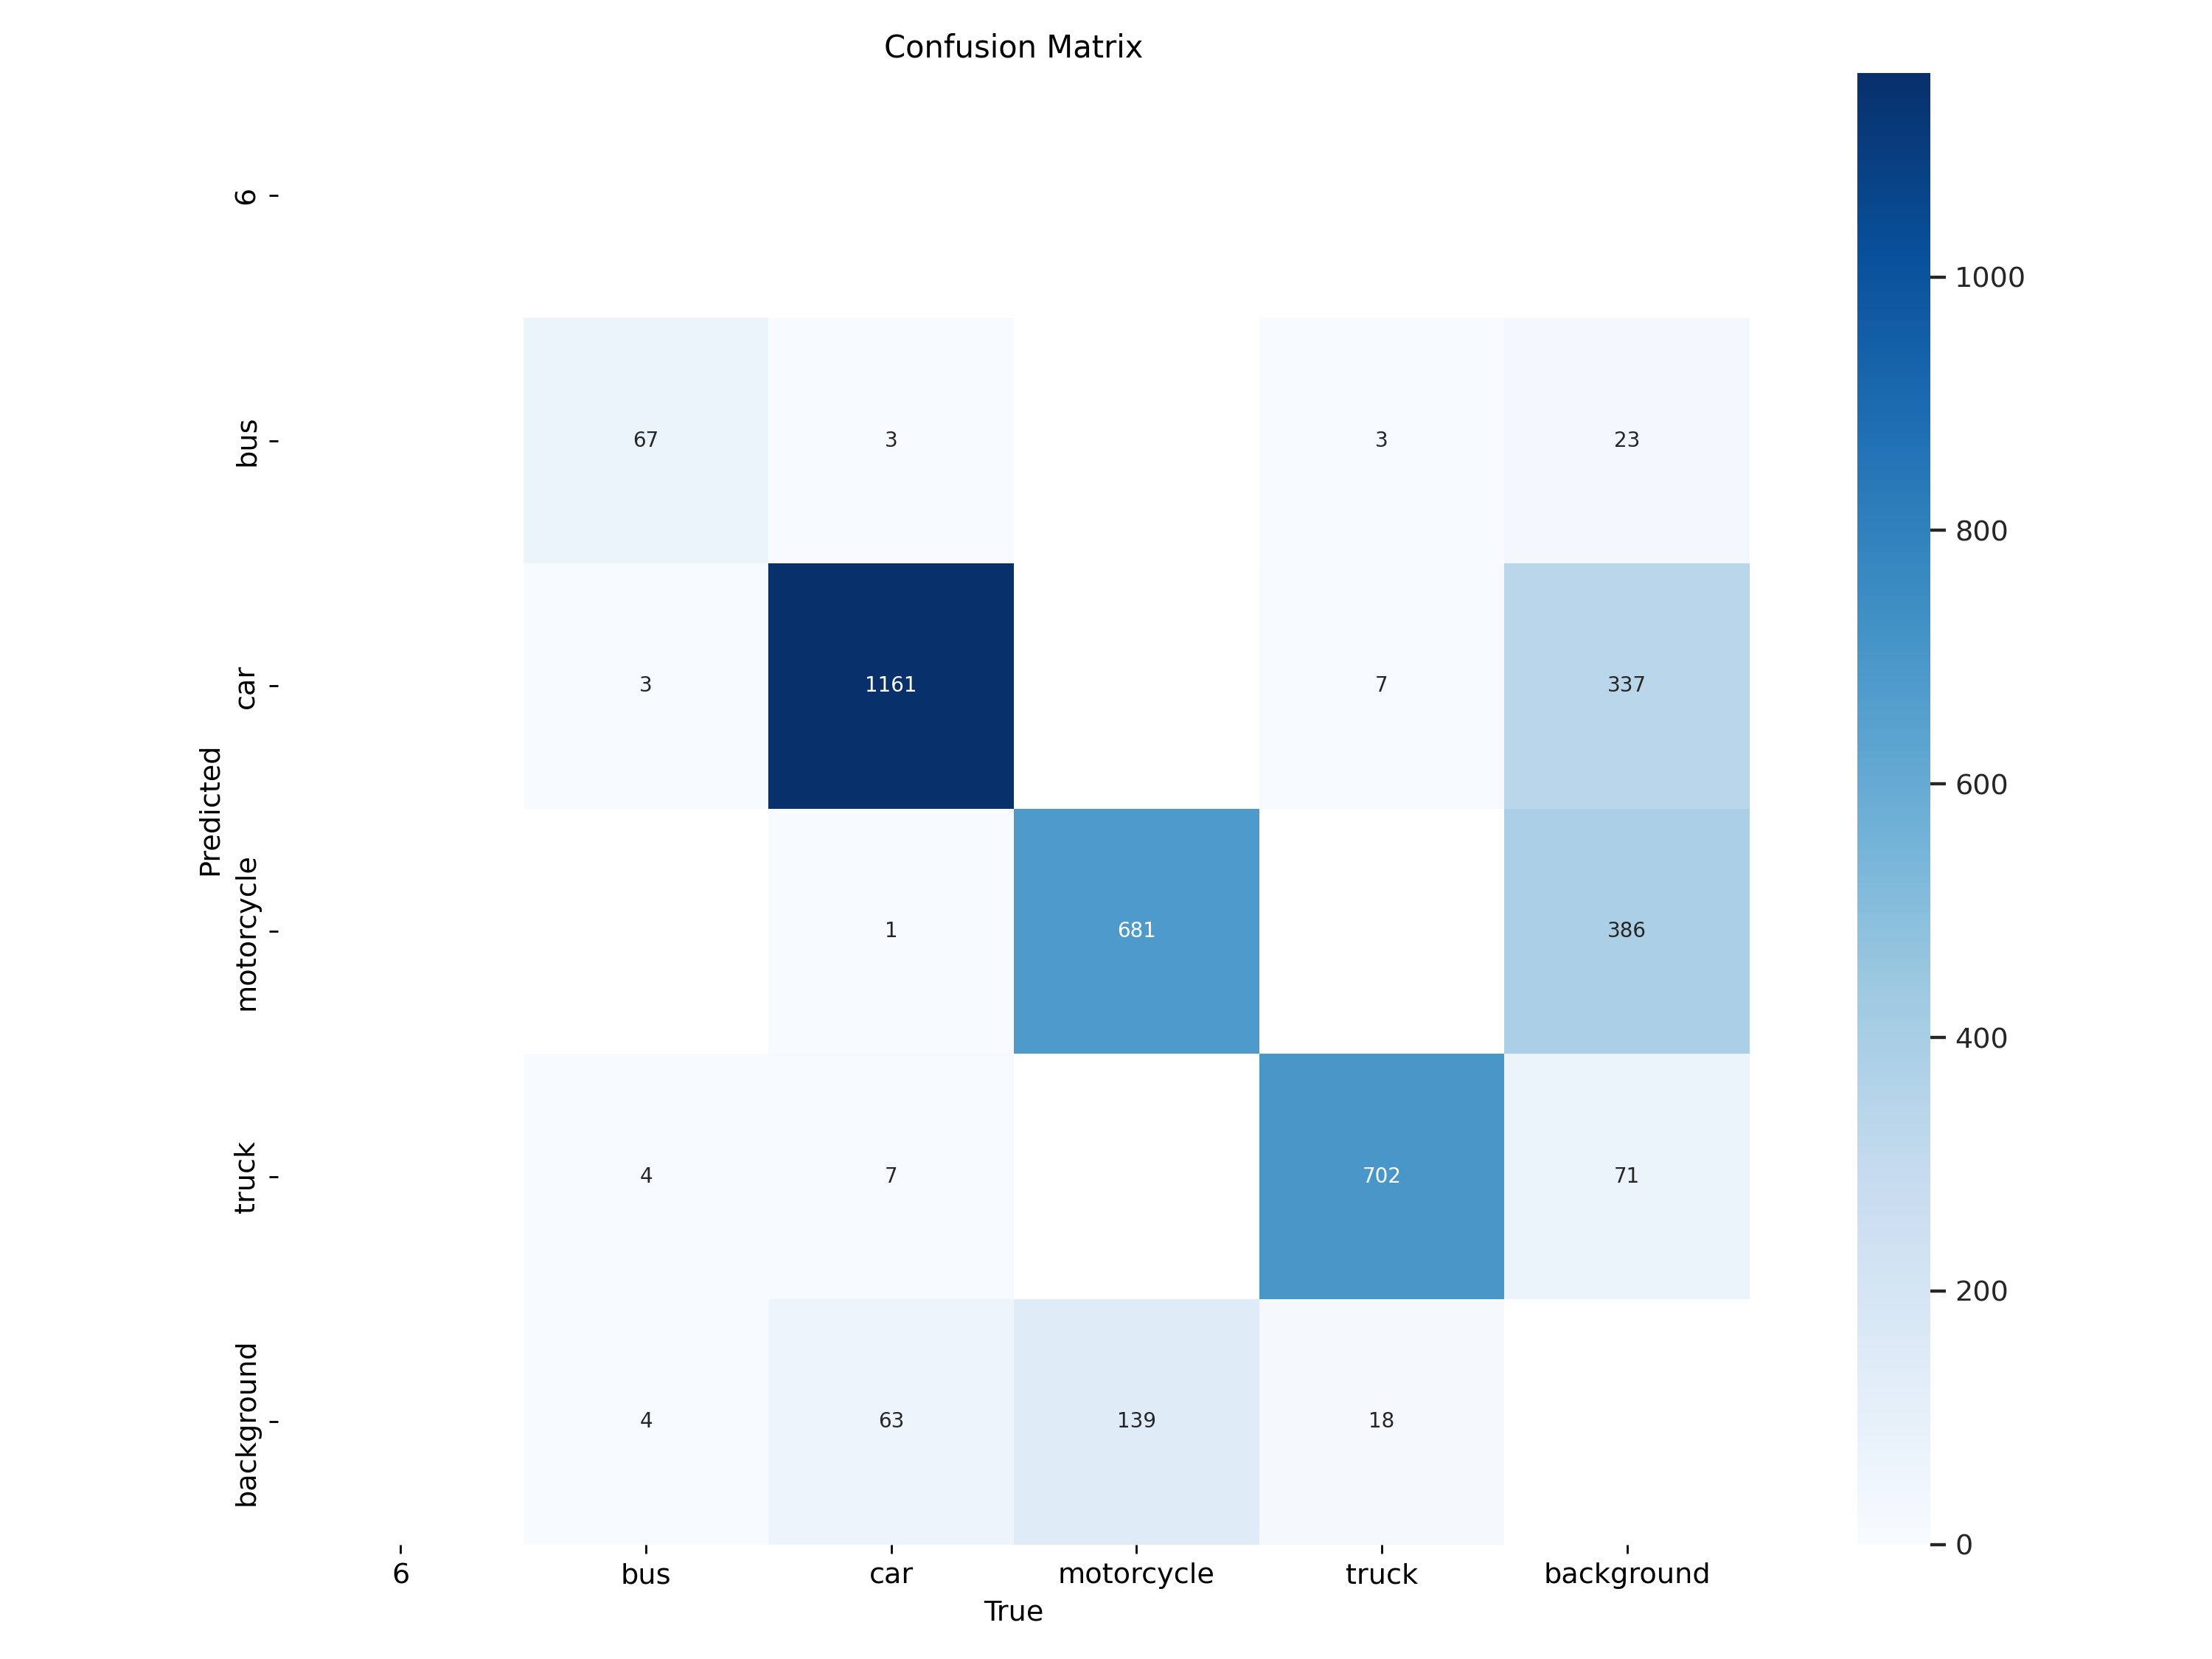

In [ ]:
Image(filename='/content/drive/MyDrive/runs/detect/train/confusion_matrix.png', width=600) # accesses the confusion matrix plot from the specifies file path

#### Graphical Representation of the Evaluation Metrics in the Object Detection Model.

- **mAP@50 (Mean Average Precision at IoU=0.50)**: 
  Measures the average precision of the model across all classes at a specific Intersection over Union (IoU) threshold of 0.50. It evaluates how well the model detects objects while considering the spatial overlap between predicted and ground truth bounding boxes.

- **mAP@50-95 (Mean Average Precision at IoU=0.50 to 0.95)**: 
  A more comprehensive measure that averages precision across multiple IoU thresholds (from 0.50 to 0.95). This metric assesses the model's performance across varying levels of detection accuracy.


- **Precision**: Precision calculates the proportion of correctly predicted positive instances out of all predicted positives. It is useful when minimizing false positives is important.
  
  $$
  \text{Precision} = \frac{\text{TP}}{\text{TP + FP}}
  $$


- **Recall (Sensitivity or True Positive Rate)**: Recall measures the proportion of correctly predicted positive instances out of all actual positives. It is crucial when missing positive instances (false negatives) is costly.

  $$
  \text{Recall} = \frac{\text{TP}}{\text{TP + FN}}
  $$

- **F1-Score** : The F1-Score is the harmonic mean of precision and recall. It balances the two metrics and is useful when both false positives and false negatives are important.

  $$
  \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$


- **Box Loss**: 
  Measures the error in predicting the bounding box coordinates. It quantifies how well the predicted boxes match the ground truth boxes. Lower box loss indicates better localization performance.

- **Class Loss**: 
  Represents the error in predicting the class labels for detected objects. It evaluates how well the model distinguishes between different classes. Lower class loss indicates better classification performance.


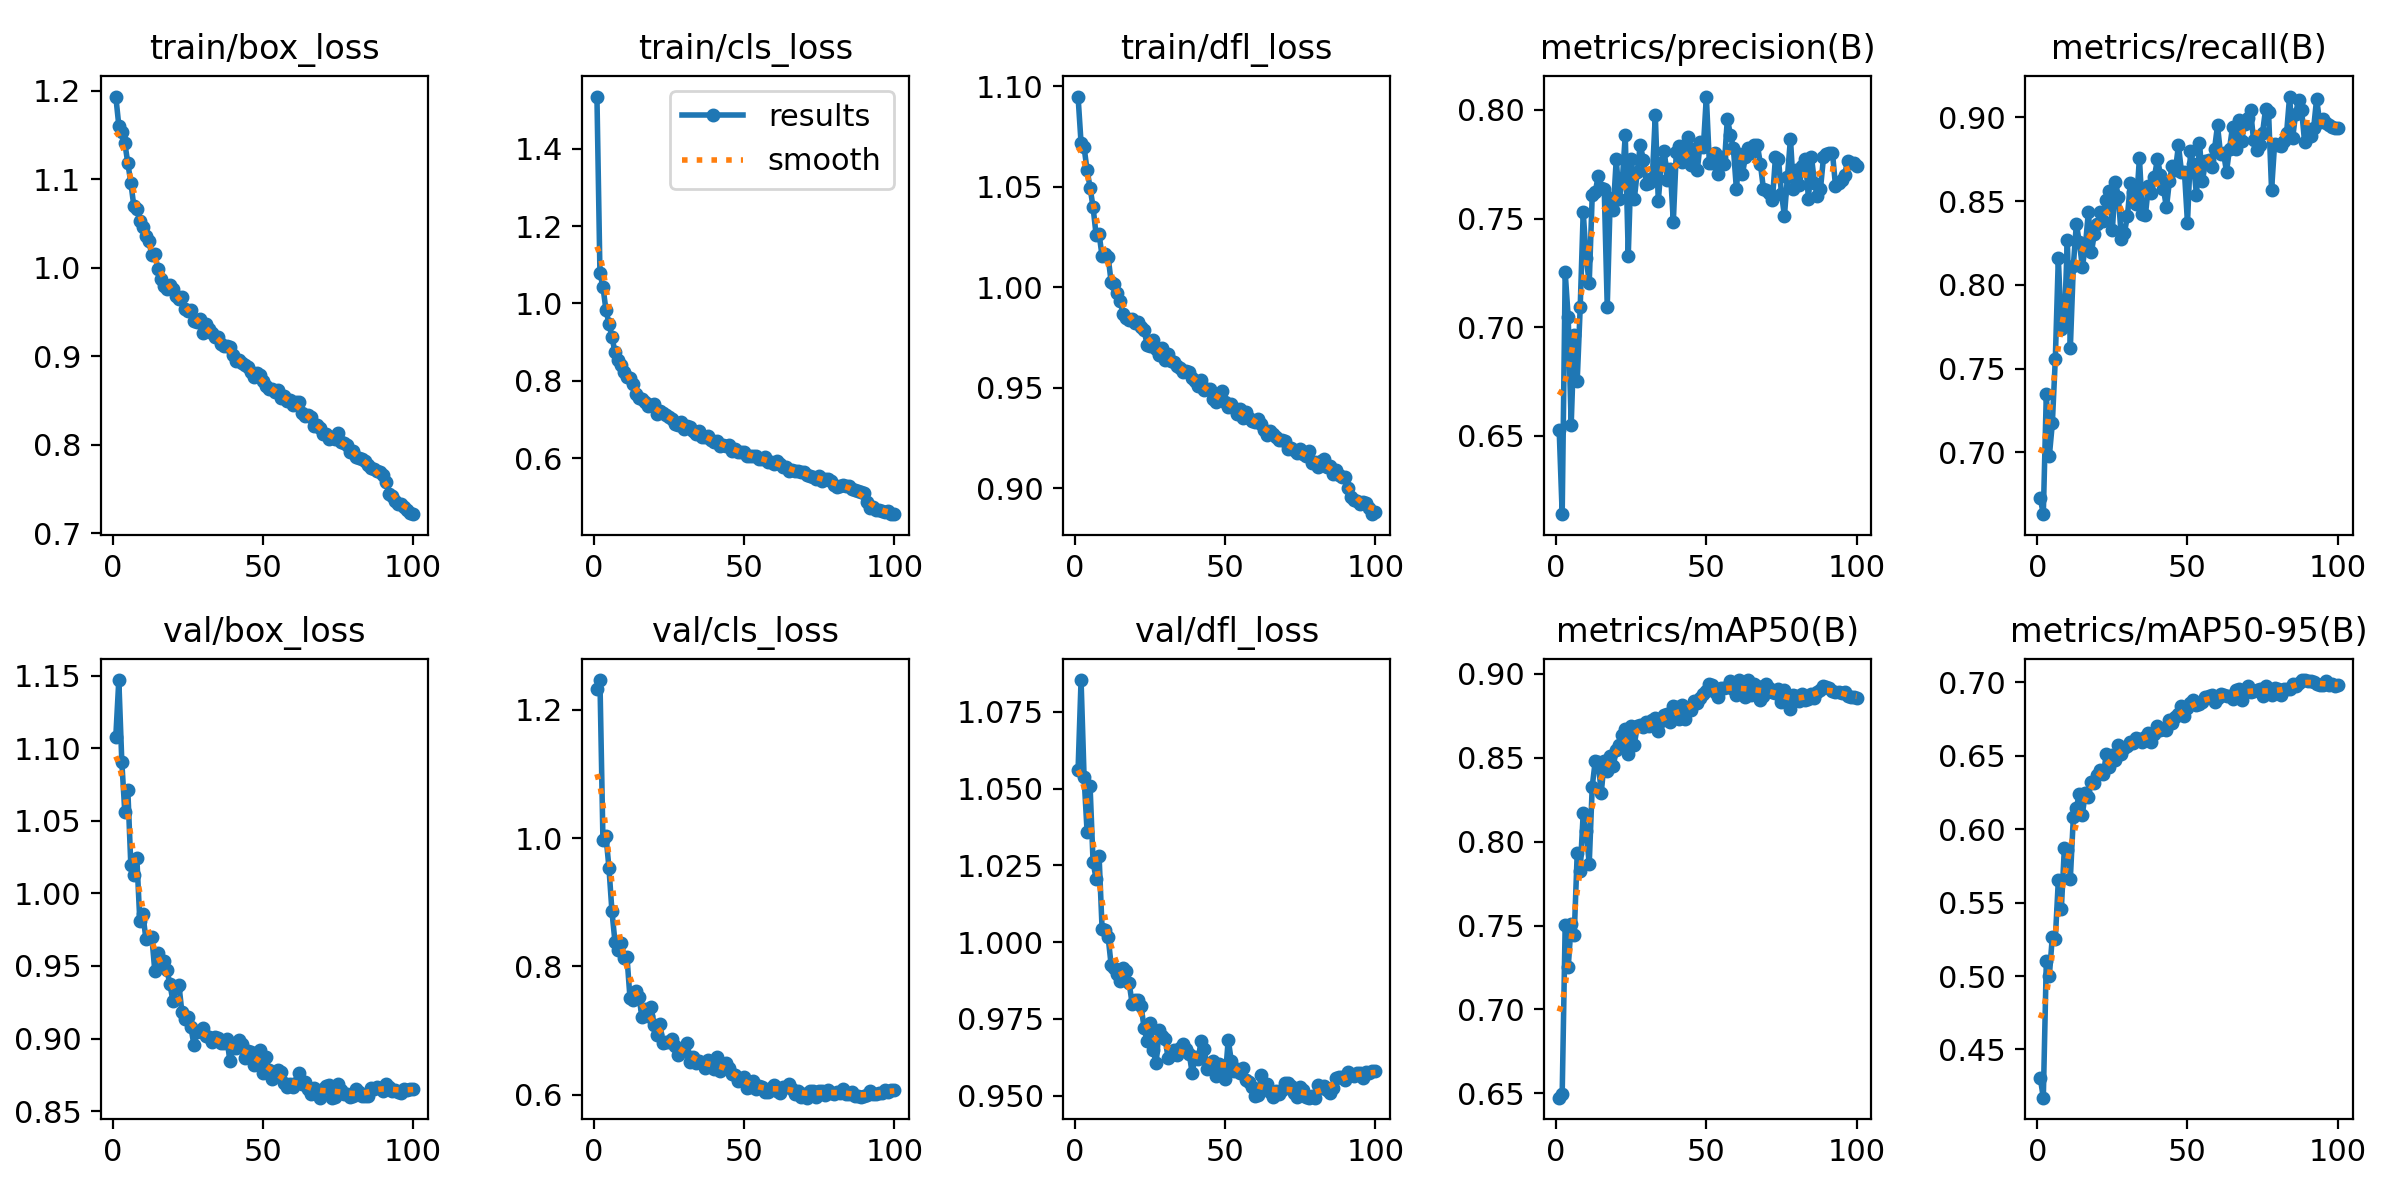

In [ ]:
Image(filename='/content/drive/MyDrive/runs/detect/train/results.png', width=600) # accesses the evaluation metrics plots from the specifed file path

### Making (Object) Detections on New Images


- `!yolo`: Runs the YOLO command.
- `task=detect`: Sets the task to "detection" to identify objects in the images.
- `mode=predict`: Puts the model in prediction mode to process new data.
- `model=/content/drive/MyDrive/runs/detect/train/weights/best.pt`: Specifies the path to the trained model weights file.
- `conf=0.25`: Sets the confidence threshold to 0.25, meaning only detections with confidence above 25% will be shown.
- `source=/content/drive/MyDrive/Traffic-Control-with-CV-1/test/images`: Specifies the folder containing the images for prediction.
- `save=True`: Saves the output images with bounding boxes and labels applied to the specified source directory.


In [12]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Traffic-Control-with-CV-1/test/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/539 /content/drive/MyDrive/Traffic-Control-with-CV-1/test/images/1001_jpg.rf.7c99957e24c1728baa2d760ba067a88e.jpg: 640x640 2 cars, 5 trucks, 871.6ms
image 2/539 /content/drive/MyDrive/Traffic-Control-with-CV-1/test/images/1022_jpg.rf.aca9ba42b71eab7712d435b644c2a460.jpg: 640x640 1 bus, 2 cars, 2 trucks, 858.2ms
image 3/539 /content/drive/MyDrive/Traffic-Control-with-CV-1/test/images/1025_jpg.rf.c4b9b8204b0a10b54ef2e6bb5f705386.jpg: 640x640 1 bus, 2 cars, 2 trucks, 716.7ms
image 4/539 /content/drive/MyDrive/Traffic-Control-with-CV-1/test/images/1027_jpg.rf.a8aa8416c8a23bb9013b50a9e8ac0ba5.jpg: 640x640 1 bus, 2 cars, 2 trucks, 935.4ms
image 5/539 /content/drive/MyDrive/Traffic-Control-with-CV-1/test/images/1037_jpg.rf.f7c4e83d0da9d91b42bd2db54672a449.jpg: 640x640 4 cars, 2 trucks, 1009.6ms
image 6/539 /content/dri

#### Displaying the Images with the Detections

In [ ]:
# imports the glob module from Pillow Library for finding paths that match a specified pattern
import glob

# imports display and image functions from the ipython package for displayng inline images, or via paths or URLS.
from IPython.display import Image, display

# loops through all image file paths in a specified directory with a .jpg extension
for image_path in glob.glob(f'/content/drive/MyDrive/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600)) # displays the image with the various detections

## Section 3: YOLOv8 Inference

To evaluate the model's performance, real-time inference will be conducted using the OpenCV library.

In [56]:
# install the necessary libraries: PyTorch, Torchvision, OpenCV, and Ultralytics for running YOLOv8 and handling computer vision tasks
!pip install torch torchvision opencv-python ultralytics
!pip install ultralytics


In [ ]:
import cv2
from ultralytics import YOLO  # Importing YOLO from the ultralytics package

# Load the YOLOv8 model
model = YOLO('best.pt')  # Replace with the path to your trained model

# Define class names mapping
class_names = {
    1: "bus",
    2: "car",
    3: "motorcycle",
    4: "truck"
}

# Open the video file or capture from webcam
video_source = 'Highway 401 West of Toronto [HffMxVnOVPw].f135.mp4'  # Change this to your input video path or use 0 for webcam
cap = cv2.VideoCapture(video_source)

# Check if the video source opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video frame width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object to save the output video
output_file = 'out_video_2.avi'  # Output video file name
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_file, fourcc, 20.0, (frame_width, frame_height))

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()  # Read a frame from the video
    if not ret:
        break  # Break the loop if no frames are returned

    # Perform inference
    results = model(frame)

    # Draw results on the frame
    for result in results:  # Iterate over detected objects
        for box in result.boxes:  # Iterate through detected boxes
            x1, y1, x2, y2 = box.xyxy[0]  # Unpack box coordinates
            conf = box.conf[0]  # Confidence score
            cls = int(box.cls[0])  # Class ID
            label = f'{class_names[cls]}: {conf:.2f}'  # Use class name for label
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw bounding box
            cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  # Draw label

    # Write the frame to the output video file
    out.write(frame)

    # Display the frame with detections
    cv2.imshow('YOLOv8 Detection', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"Output video saved as {output_file}")



0: 384x640 27 cars, 469.6ms
Speed: 33.3ms preprocess, 469.6ms inference, 35.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 cars, 323.4ms
Speed: 12.8ms preprocess, 323.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 cars, 1 truck, 241.3ms
Speed: 4.5ms preprocess, 241.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 cars, 257.2ms
Speed: 0.0ms preprocess, 257.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 cars, 247.0ms
Speed: 7.0ms preprocess, 247.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 cars, 243.3ms
Speed: 5.0ms preprocess, 243.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 cars, 241.2ms
Speed: 0.0ms preprocess, 241.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 cars, 248.4ms
Speed: 0.0ms preprocess, 248.4ms inference, 1.0ms postprocess per imag